# Advanced Data Analysis 2023/24 - assignment 1

**NAME:**

**NUMBER:**

This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on information about Olympic games.


The data in the dataset provided was obtained from Kaggle.


### DEADLINE: 29-September-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline.

Students have **three grace days** that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [3]:
!unzip /content/data.zip

Archive:  /content/data.zip
  inflating: data/.DS_Store          
   creating: data/.ipynb_checkpoints/
  inflating: data/.ipynb_checkpoints/athlete_events-checkpoint.csv  
  inflating: data/.ipynb_checkpoints/codes-checkpoint.csv  
  inflating: data/.ipynb_checkpoints/noc_regions-checkpoint.csv  
  inflating: data/.ipynb_checkpoints/population-checkpoint.csv  
  inflating: data/athlete_events.csv  
  inflating: data/codes.csv          
  inflating: data/population.csv     


In [5]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Datasets

For solving the questions posed, you have the following datasets available.

### Olympic Games Data

Data from the Olympic Games, for the period considered, were collected for each individual athlete in a given Olympic event (or race) and recorded in the file `athlete_events.csv`. For example, the following entry is for the first gold medal won by a Portuguese woman:

| |ID |Name |Sex |Age |Height |Weight |Team |NOC |Games |Year |Season |City |Sport |Event |Medal|
|---|---|-------|-------|-------|-------|-------|- ------|-------|-------|-------|-------|-------|--- ----|-----------|-----|
|164334 |82494 |Rosa Mara Correia dos Santos Mota |F |30 |157 |45 |Portugal |POR |1988 Summer |1988 |Summer |Seoul |Athletics |Athletics Women's Marathon |Gold|

The file structure is illustrated in the figure below:

![Olympic data](imgs/raw_athlete_events.png)

As can be seen, various information is recorded for each individual athlete in a given Olympic event, such as name (`Name`), gender (`Sex`), age (`Age`), edition of the Olympic Games (`Games `), the Olympic event (`Event`) among others. It should be noted that, for each athlete, there is an identifier (`ID`) that is unique to that athlete and invariable - it remains for all Olympic events in which that athlete has participated, regardless of the edition (year).

Regarding Olympic events, there are individual events and team events - e.g. football and the 4x100m relay are team events. In team events, the data includes one record for each athlete on the team.

### Population

CSV file `population.csv` includes information about the population of each country for a given year.

The csv file includes ISO3 code of the country (in lower case) (`geo`), the name of the country (`name`), the year (`time`) and the population (`population`).

### Country codes

CSV file `codes.csv` includes information about the different codes used for different countries.

The csv file includes, among other, the name of the country (`Country`), ISO3 code (`ISO3`) and the national olympic code (`IOC`).


The following code loads the datasets.


In [6]:
dataFileName = os.path.join( "data", "athlete_events.csv")

dataDF = pd.read_csv(dataFileName)

dataDF

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [12]:
codesFileName = os.path.join( "data", "codes.csv")

codesDF = pd.read_csv(codesFileName)

codesDF

,Country,ISO2,ISO3,ISON,IOC,FIPS,Plates,Domain
0,Afghanistan,AF,AFG,4.0,AFG,AF,AFG,.af
1,Åland Islands,AX,ALA,248.0,NaN,NaN,AX,.ax
2,Albania,AL,ALB,8.0,ALB,AL,AL,.al
3,Algeria,DZ,DZA,12.0,ALG,AG,DZ,.dz
4,American Samoa,AS,ASM,16.0,ASA,AQ,USA,.as
...,...,...,...,...,...,...,...,...
245,Wallis and Futuna,WF,WLF,876.0,NaN,WF,NaN,.wf
246,Western Sahara,EH,ESH,732.0,NaN,WI,WSA,.eh
247,Yemen,YE,YEM,887.0,YEM,YM,YEM,.ye
248,Zambia,ZM,ZMB,894.0,ZAM,ZA,Z,.zm


In [9]:
populationFileName = os.path.join( "data", "population.csv")

populationDF = pd.read_csv(populationFileName)

print(populationDF)

       geo         name  time  Population
0      afg  Afghanistan  1800   3280000.0
1      afg  Afghanistan  1801   3280000.0
2      afg  Afghanistan  1802   3280000.0
3      afg  Afghanistan  1803   3280000.0
4      afg  Afghanistan  1804   3280000.0
...    ...          ...   ...         ...
59292  zwe     Zimbabwe  2096  35469605.0
59293  zwe     Zimbabwe  2097  35517791.0
59294  zwe     Zimbabwe  2098  35561279.0
59295  zwe     Zimbabwe  2099  35599779.0
59296  zwe     Zimbabwe  2100  35633415.0

[59297 rows x 4 columns]


For data on atheletes, there are some information missing. We can compute the number of entries missing using the following code.

**NOTE:** the missing information on Medal is expected - it just means that the athlete has won no medal in the event.

In [10]:
dataDF.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

**GENERAL NOTE:** In your computations, if there are rows for which needed information is missing, just drop the rows.

## Question 1 (7 points)

In this question, we start by exploring the data available with simple queries. In your answers, you can use the data computed in the previous answers if and when useful.


### **1.a)** How many athletes have participated in Summer Olympics and how many athlete participated in Winter Olympics?



In [42]:
# Finding the number of athletes that participated in the Olympics per season
num_athletes_per_season = dataDF.groupby('Season')['ID'].nunique().reset_index().rename(columns={'ID': 'Number Of Athletes'})

# Displaying the result
num_athletes_per_season
num_athletes_per_season.reset_index(drop=True)


,Season,Number Of Athletes
0,Summer,116776
1,Winter,18958


### **1.b)** Who are the three youngest and oldest athletes that won a Gold medal in the Olympic games?

Show the following information about each athelete: Name, Age, Team, Games, Sport and Event.


In [43]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# Gold medalists without order
gold = dataDF[dataDF['Medal'] == 'Gold']

# Sorting in ascending order by age
gold_medalists_list = gold.sort_values(by='Age')

# Eliminating nan values in the age column
gold_medalists_list.dropna(subset = ['Age'], inplace=True)

# Computing the three youngest gold medalists
three_youngest_gold_medalists = gold_medalists_list.head(3)

# Computing the three oldest gold medalists
three_oldest_gold_medalists = gold_medalists_list.tail(3)

# Creating a data frame with the three youngest gold medalists
youngest_df = three_youngest_gold_medalists[["Name", "Age","Team","Games","Sport","Event"]]

# Creating a data frame with the three oldest gold medalists
oldest_df = three_oldest_gold_medalists[["Name", "Age","Team","Games","Sport","Event"]]

# Creating a data frame with the three youngest gold medalists and the three oldest gold medalists
final_df = [youngest_df,oldest_df]
youngest_oldest_df = pd.concat(final_df)

# Converting the age values from float to integer
youngest_oldest_df["Age"] = youngest_oldest_df["Age"].astype(int)
youngest_oldest_df
youngest_oldest_df.reset_index(drop=True)

,Name,Age,Team,Games,Sport,Event
0,Klaus Zerta,13,Germany,1960 Summer,Rowing,Rowing Men's Coxed Pairs
1,Donna Elizabeth de Varona (-Pinto),13,United States,1960 Summer,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay
2,Kim Yun-Mi,13,South Korea,1994 Winter,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres..."
3,"Robert W. Williams, Jr.",63,Potomac Archers,1904 Summer,Archery,Archery Men's Team Round
4,Oscar Gomer Swahn,64,Sweden,1912 Summer,Shooting,"Shooting Men's Running Target, Single Shot, Team"
5,Charles Jacobus,64,United States,1904 Summer,Roque,Roque Men's Singles


### 1.c) Who are the top-10 athletes that have won more Gold medals in the Olympic Games?



In [45]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
# Filter and count gold medalists
gold_medals = dataDF[dataDF['Medal'] == 'Gold']
gold_medal_counts = gold_medals.groupby('ID')['Name'].count().reset_index()

# Find the athlete names
athlete_names = gold_medals[['ID', 'Name']].drop_duplicates()

# Merge the counts with athlete names
top_10_gold_athletes = gold_medal_counts.nlargest(10, columns='Name').merge(athlete_names, on='ID')

# Renaming the columns to show the correct results
top_10_gold_athletes.rename(columns = {'Name_x': 'Number of Medals'}, inplace = True)
top_10_gold_athletes.rename(columns = {'Name_y':'Name'}, inplace = True)

# Dropping the ID column
top_10_gold_athletes= top_10_gold_athletes.drop("ID", axis='columns')

top_10_gold_athletes

,Number of Medals,Name
0,23,"Michael Fred Phelps, II"
1,10,"Raymond Clarence ""Ray"" Ewry"
2,9,Larysa Semenivna Latynina (Diriy-)
3,9,"Frederick Carlton ""Carl"" Lewis"
4,9,Paavo Johannes Nurmi
5,9,Mark Andrew Spitz
6,8,"Matthew Nicholas ""Matt"" Biondi"
7,8,Ole Einar Bjrndalen
8,8,Usain St. Leo Bolt
9,8,Birgit Fischer-Schmidt


### 1.d) For Summer Olympics, after 1950, who are the athletes that have won more medals in each edition?

Show the following information: Year, Name of athlete, and number of medals.

In [47]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
# Creating an array of possible medals
possible_medals = ['Gold', 'Silver', 'Bronze']

# Filter data for Summer Olympics after 1950 with medals won
athletes_with_most_medals_summer_per_edition = dataDF[(dataDF['Season'] == 'Summer') & (dataDF['Year'] > 1950) & (dataDF['Medal'].isin(possible_medals))]

# Group by Year, Name, and ID, count medals, and find the athletes with the most medals per edition
athletes_with_most_medals_summer_per_edition = athletes_with_most_medals_summer_per_edition.groupby(['Year', 'Name', 'ID'])['Medal'].count().reset_index()
athletes_with_most_medals_summer_per_edition = athletes_with_most_medals_summer_per_edition.loc[athletes_with_most_medals_summer_per_edition.groupby('Year')['Medal'].idxmax()]

# Rename columns
athletes_with_most_medals_summer_per_edition = athletes_with_most_medals_summer_per_edition.rename(columns={'Medal': 'Number of Medals', 'Name': 'Name of Athlete'})

# Reset index
athletes_with_most_medals_summer_per_edition.reset_index(drop=True, inplace=True)

athletes_with_most_medals_summer_per_edition= athletes_with_most_medals_summer_per_edition.drop("ID", axis='columns')

# Display the result
athletes_with_most_medals_summer_per_edition

,Year,Name of Athlete,Number of Medals
0,1952,Mariya Kindrativna Horokhovska,7
1,1956,Larysa Semenivna Latynina (Diriy-),6
2,1960,Borys Anfiyanovych Shakhlin,7
3,1964,Larysa Semenivna Latynina (Diriy-),6
4,1968,Mikhail Yakovlevich Voronin,7
5,1972,Mark Andrew Spitz,7
6,1976,Nikolay Yefimovich Andrianov,7
7,1980,Aleksandr Nikolayevich Dityatin,8
8,1984,Li Ning,6
9,1988,"Matthew Nicholas ""Matt"" Biondi",7


### 1.e) For each athlete, compute the number of gold, silver and bronze medals she/he has won.

**Suggestions:** two alternative suggestion are investigating pivot tables and custom defined aggregation functions.


In [48]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# Creating an array of possible medals
possible_medals = ['Gold', 'Silver', 'Bronze']

# Define a custom aggregation function to count medals
def count_medals(series):
    return series[series.isin(possible_medals)].count()

# Filter data for rows with medals
medal_data = dataDF.dropna(subset=['Medal'])

# Group by 'ID', 'Name', and 'Medal' and apply the custom aggregation function
medal_counts = medal_data.groupby(['ID', 'Name', 'Medal'])['Medal'].agg(count_medals).unstack(fill_value=0).reset_index()

# Rename columns
medal_counts.columns = ['ID', 'Name', 'Number of Bronze Medals', 'Number of Gold Medals', 'Number of Silver Medals']

# Create a DataFrame with just the medal count columns
athlete_medals = medal_counts[['Name','Number of Bronze Medals', 'Number of Gold Medals', 'Number of Silver Medals']]

# Display the result
athlete_medals
athlete_medals.reset_index(drop=True)

,Name,Number of Bronze Medals,Number of Gold Medals,Number of Silver Medals
0,Edgar Lindenau Aabye,0,1,0
1,Arvo Ossian Aaltonen,2,0,0
2,Juhamatti Tapio Aaltonen,1,0,0
3,Paavo Johannes Aaltonen,2,3,0
4,Kjetil Andr Aamodt,2,4,2
...,...,...,...,...
28246,Krzysztof Zwoliski,0,0,1
28247,Henk Jan Zwolle,1,1,0
28248,Galina Ivanovna Zybina (-Fyodorova),1,1,1
28249,Bogusaw Zych,1,0,0


### 1.f) For the games of 2016, print the table of medals for each country.

**NOTE:** for collective events (e.g. football, 4*100 meters), you should count only one medal for a given event.
In the cell after the code, explain the rationale of the code to achieve this goal - your solution does not need to be perfect, but only an approximation of the real value.


In [49]:
#Solve question here. Briefly justify your solution in the following markdown cell.
# Creating an array of possible medals
possible_medals = ['Gold', 'Silver', 'Bronze']

# Filter data for the year 2016 and only rows with medals
medal_data_2016 = dataDF[(dataDF['Year'] == 2016) & dataDF['Medal'].isin(possible_medals)]

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
medal_data_2016 = medal_data_2016.copy()

# Remove duplicates for collective events by keeping the first occurrence
medal_data_2016.drop_duplicates(subset=['Event', 'NOC','Medal'], keep='first', inplace=True)

# Group by ID, Name, NOC, and Medal, then pivot to get medal counts
medal_counts_2016 = medal_data_2016.groupby(['ID', 'Name', 'NOC', 'Medal']).size().unstack(fill_value=0).reset_index()

# Rename columns
medal_counts_2016.columns = ['ID', 'Name', 'NOC', 'Bronze', 'Gold', 'Silver']

# Group by NOC to get total medals per country
medals_per_country_2016 = medal_counts_2016.groupby(['NOC']).sum(numeric_only=True).reset_index()

# Calculate the total number of medals and rename the 'NOC' column
medals_per_country_2016['Total Number Of Medals'] = medals_per_country_2016[['Bronze', 'Gold', 'Silver']].sum(axis=1)
medals_per_country_2016.rename(columns={'NOC': 'Name_Country'}, inplace=True)

# Drop unnecessary columns
medals_per_country_2016.drop(columns=["ID"], inplace=True)

# Display the result
medals_per_country_2016

,Name_Country,Bronze,Gold,Silver,Total Number Of Medals
0,ALG,0,0,2,2
1,ARG,0,3,1,4
2,ARM,0,1,3,4
3,AUS,10,8,11,29
4,AUT,1,0,0,1
...,...,...,...,...,...
81,UKR,4,2,5,11
82,USA,38,46,37,121
83,UZB,7,4,2,13
84,VEN,2,0,1,3


**Rationale:** The rationale of the code to achieve this goal more accurately would be to understand which sports are collective or not and separate it in two dataframes (one with collective sports and other with non-collective sports). Having a column on the dataset with the classifier (Non-Collective or Collective) could help to this task more precisely.
The dataframe with non-collective sports would follow a normal count of medals and the one with the collective sports would do a count grouped by the team and the sport over unique ID's in order to only count the ID's once. Then I would join the values and the countries together to bring more accurate values.

## Question 2 (2 points)

It is normal that smaller countries conquer less medals, as their population is smaller.
In this question, we try to put the number of medals into prespective, considering the population of countries.




### 2.a) For the games of 2016, print the table of medals for each country per million inhabitants.



In [51]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# Clean the 'geo' column
populationDF['geo'] = populationDF['geo'].str.upper()

## Creating a dataframe with the code that we will use
code = codesDF[['Country','ISO3','IOC']]
code = code.copy()

## Dropping null values from the dataframe with the codes
code.dropna(subset=['ISO3'], inplace=True)

# Filter population data for the year 2016
population_2016 = populationDF[populationDF['time'] == 2016]

## Merging the first dataframe with the necessary codes to avoid missing matching values and keeping all the values from the two dataframes
codes_df = code.merge(population_2016, left_on='ISO3', right_on='geo', how='left')

## Merging with dataframe from the previous exercise with the format that we actuall want without losing any values
medals_country_per_million_inhabitants = codes_df.merge(medals_per_country_2016, left_on='IOC', right_on= 'Name_Country', how='left')

# Calculate Medals per Million Inhabitants
medals_country_per_million_inhabitants['Medals per Million Inhabitants'] = (medals_country_per_million_inhabitants['Total Number Of Medals'] / medals_country_per_million_inhabitants['Population']) * 1000000

## Dropping null values from the result column
medals_country_per_million_inhabitants.dropna(subset=['Medals per Million Inhabitants'], inplace=True)

## Dropping unnecessary columns
medals_country_per_million_inhabitants= medals_country_per_million_inhabitants.drop(['ISO3', 'IOC','geo','name','time','Name_Country'], axis='columns').reset_index(drop=True)

# Casting the float values to int
medals_country_per_million_inhabitants["Population"] = medals_country_per_million_inhabitants["Population"].astype(int)
medals_country_per_million_inhabitants["Bronze"] = medals_country_per_million_inhabitants["Bronze"].astype(int)
medals_country_per_million_inhabitants["Silver"] = medals_country_per_million_inhabitants["Silver"].astype(int)
medals_country_per_million_inhabitants["Gold"] = medals_country_per_million_inhabitants["Gold"].astype(int)
medals_country_per_million_inhabitants["Total Number Of Medals"] = medals_country_per_million_inhabitants["Total Number Of Medals"].astype(int)

# Print the result
medals_country_per_million_inhabitants



,Country,Population,Bronze,Gold,Silver,Total Number Of Medals,Medals per Million Inhabitants
0,Algeria,40339329,0,0,2,2,0.049579
1,Argentina,43668241,0,3,1,4,0.091600
2,Armenia,2865835,0,1,3,4,1.395754
3,Australia,24195701,10,8,11,29,1.198560
4,Austria,8736487,1,0,0,1,0.114462
...,...,...,...,...,...,...,...
78,United Kingdom,65655203,17,27,23,67,1.020483
79,United States of America,327210198,38,46,37,121,0.369793
80,Uzbekistan,31453574,7,4,2,13,0.413308
81,Venezuela,30741464,2,0,1,3,0.097588


## Question 3 (4 points)

This third question focus on processing the information on a
time series for plotting it.


### 3.a) Display the information about the number of athletes and medals wons by a country in the Olympic games over the years.

Select a country that has a significative number of medals and plot the results.
Discuss the rationale of your solution, including why you have decided to show the lines you are presenting and any processing you have done to the lines.


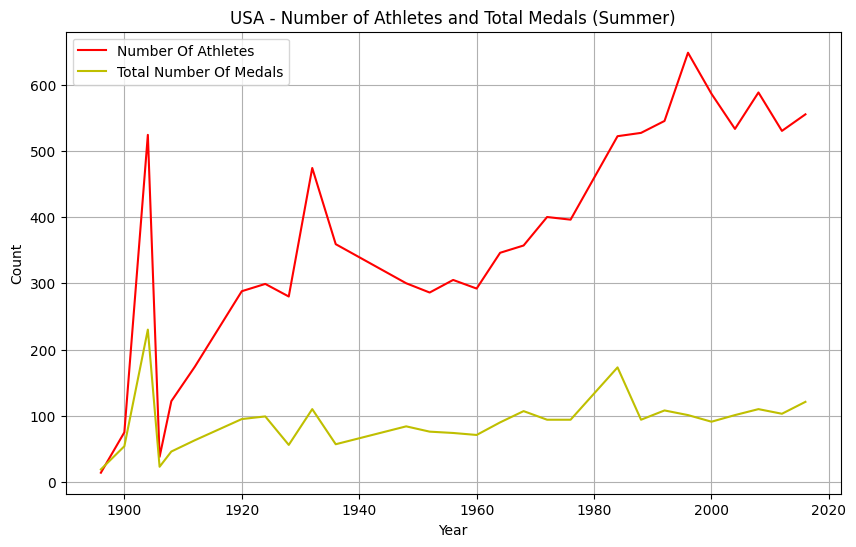

In [52]:
#Solve question here. Briefly justify your solution in the following markdown cell.

# Define a list of possible medal types: Gold, Silver, Bronze
possible_medals = ['Gold', 'Silver', 'Bronze']

# Filter the dataDF DataFrame to get only rows for Summer Olympics and medals in the possible_medals list
medal_data_summer = dataDF[(dataDF['Season'] == 'Summer') & dataDF['Medal'].isin(possible_medals)]

# Filter the dataDF DataFrame to get only rows for Summer Olympics
athlete_data_summer = dataDF[(dataDF['Season'] == 'Summer')]

# Create copies of the filtered DataFrames to avoid modifying the original DataFrames
medal_data_summer = medal_data_summer.copy()
athlete_data_summer = athlete_data_summer.copy()

# Remove duplicate rows based on specific columns in each DataFrame
medal_data_summer.drop_duplicates(subset=['Year', 'NOC', 'Event', 'Medal'], keep='first', inplace=True)
athlete_data_summer.drop_duplicates(subset=['ID', 'Year', 'NOC', 'Event'], keep='first', inplace=True)

# Group athlete data by Year and NOC (National Olympic Committee) and count the unique athlete IDs
athletes_per_country_year = athlete_data_summer.groupby(['Year', 'NOC'])['ID'].nunique().reset_index()
athletes_per_country_year.rename(columns={'ID': 'Number Of Athletes', 'NOC': 'Country'}, inplace=True)

# Group medal data by Year, NOC, and Medal type and create a table with counts for each combination
medal_counts = medal_data_summer.groupby(['Year', 'NOC', 'Medal']).size().unstack(fill_value=0).reset_index()

# Rename columns for readability
medal_counts.columns = ['Year', 'NOC', 'Bronze', 'Gold', 'Silver']

# Group medal counts by NOC and Year to calculate the total number of medals for each country in each year
medals_per_country_over_years = medal_counts.groupby(['NOC', 'Year']).sum(numeric_only=True).reset_index()

# Calculate the total number of medals for each country in each year and add it as a new column
medals_per_country_over_years['Total Number Of Medals'] = medals_per_country_over_years[['Bronze', 'Gold', 'Silver']].sum(axis=1)

# Rename the 'NOC' column to 'Country' for consistency
medals_per_country_over_years.rename(columns={'NOC': 'Country'}, inplace=True)

# Select the top 10 countries with the most total medals and store it in the 'significative_country' variable
significative_country = medals_per_country_over_years.sort_values(by='Total Number Of Medals', ascending=False).head(10) ## USA was my option by the observation of this variable

# Merging the athletes and medals dataframes
plot_data_summer = pd.merge(athletes_per_country_year, medals_per_country_over_years, on=['Country', 'Year'])

# Filter the 'plot_data_summer' DataFrame to get data only for the United States (USA)
usa_data_summer = plot_data_summer[plot_data_summer['Country'] == 'USA']

# Select the most recent 10 years of data for the United States
plot_country = usa_data_summer.sort_values(by='Year', ascending=False).head(10)

# Create a plot to visualize the number of athletes and total medals for the United States over time
plt.figure(figsize=(10, 6))
plt.plot(usa_data_summer['Year'], usa_data_summer['Number Of Athletes'], label='Number Of Athletes', color='r')
plt.plot(usa_data_summer['Year'], usa_data_summer['Total Number Of Medals'], label='Total Number Of Medals', color='y')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('USA - Number of Athletes and Total Medals (Summer)')  # Include the season in the title
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

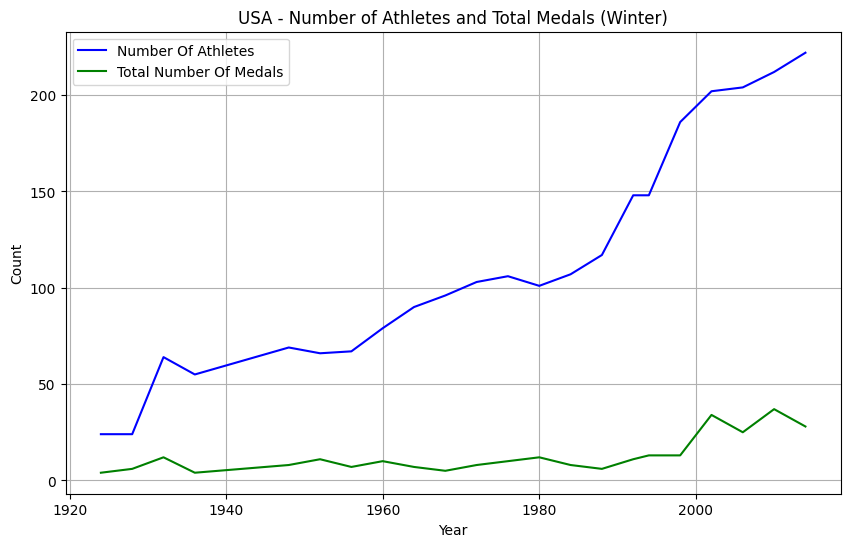

In [53]:
#Solve question here. Briefly justify your solution in the following markdown cell.

# Define a list of possible medal types: Gold, Silver, and Bronze
possible_medals = ['Gold', 'Silver', 'Bronze']

# Filter the data for Winter Olympics and medals that match the possible medal types
medal_data_winter = dataDF[(dataDF['Season'] == 'Winter') & dataDF['Medal'].isin(possible_medals)]

# Filter the data for Winter Olympics
athlete_data_winter = dataDF[(dataDF['Season'] == 'Winter')]

# Create copies of the filtered data to avoid modifying the original data
medal_data_winter = medal_data_winter.copy()
athlete_data_winter = athlete_data_winter.copy()

# Remove duplicate rows based on specific columns in medal_data_winter
medal_data_winter.drop_duplicates(subset=['Year', 'NOC', 'Event', 'Medal'], keep='first', inplace=True)

# Remove duplicate rows based on specific columns in athlete_data_winter
athlete_data_winter.drop_duplicates(subset=['ID', 'Year', 'NOC', 'Event'], keep='first', inplace=True)

# Group athlete data by Year and NOC (National Olympic Committee) to count the number of unique athletes
athletes_per_country_year = athlete_data_winter.groupby(['Year', 'NOC'])['ID'].nunique().reset_index()
athletes_per_country_year.rename(columns={'ID': 'Number Of Athletes', 'NOC': 'Country'}, inplace=True)

# Group medal data by Year, NOC, and Medal to count the number of medals of each type (Gold, Silver, Bronze)
medal_counts = medal_data_winter.groupby(['Year', 'NOC', 'Medal']).size().unstack(fill_value=0).reset_index()

# Rename the columns to include Bronze, Gold, and Silver counts
medal_counts.columns = ['Year', 'NOC', 'Bronze', 'Gold', 'Silver']

# Group medal counts by NOC and Year to get the total number of medals for each country-year
medals_per_country_over_years = medal_counts.groupby(['NOC', 'Year']).sum(numeric_only=True).reset_index()

# Calculate the total number of medals (sum of Bronze, Gold, and Silver) for each country by year
medals_per_country_over_years['Total Number Of Medals'] = medals_per_country_over_years[['Bronze', 'Gold', 'Silver']].sum(axis=1)

# Rename the 'NOC' column to 'Country' for consistency
medals_per_country_over_years.rename(columns={'NOC': 'Country'}, inplace=True)

# Merge athlete and medal data for plotting
plot_data_winter = pd.merge(athletes_per_country_year, medals_per_country_over_years, on=['Country', 'Year'])

# Filter data specifically for the USA
usa_data_winter = plot_data_winter[plot_data_winter['Country'] == 'USA'] ## Chose the same country as in summer

# Sort the USA data by Year and select the top 10 years
plot_country = usa_data_summer.sort_values(by='Year', ascending=False).head(10)

# Create a plot to visualize the number of athletes and total number of medals for the USA in Winter Olympics
plt.figure(figsize=(10, 6))
plt.plot(usa_data_winter['Year'], usa_data_winter['Number Of Athletes'], label='Number Of Athletes', color='b')
plt.plot(usa_data_winter['Year'], usa_data_winter['Total Number Of Medals'], label='Total Number Of Medals', color='g')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('USA - Number of Athletes and Total Medals (Winter)')  # Include the season in the title
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**Rationale:** My interpretation of the question was to show a plot of the number of participants of a country (in my case: USA) per edition and the total number of medals won by the country chosen per edition. So I started to find only the lines that have medals in the dataframe and then counted the number of bronze, gold and silver and the total of medals per country and per year. I also tried to find the number of athletes per country and edition. Built two dataframes (medals_per_country_over_years and athletes_per_country_year) and then merged them in order to extract only the data from USA to a plot. The solution is divided in two parts in order to develop one for summer data (first one) and other for winter data (second one). The data was treated following the same idea of the method used in 1 f) with the drop_duplicates.

### 3.b) Display trends of athletes and medals for a given country.

There might be some editions that are an outlier in the number of athletes or medals a given country wins. Instead of plotting the actual values, plot trend lines.



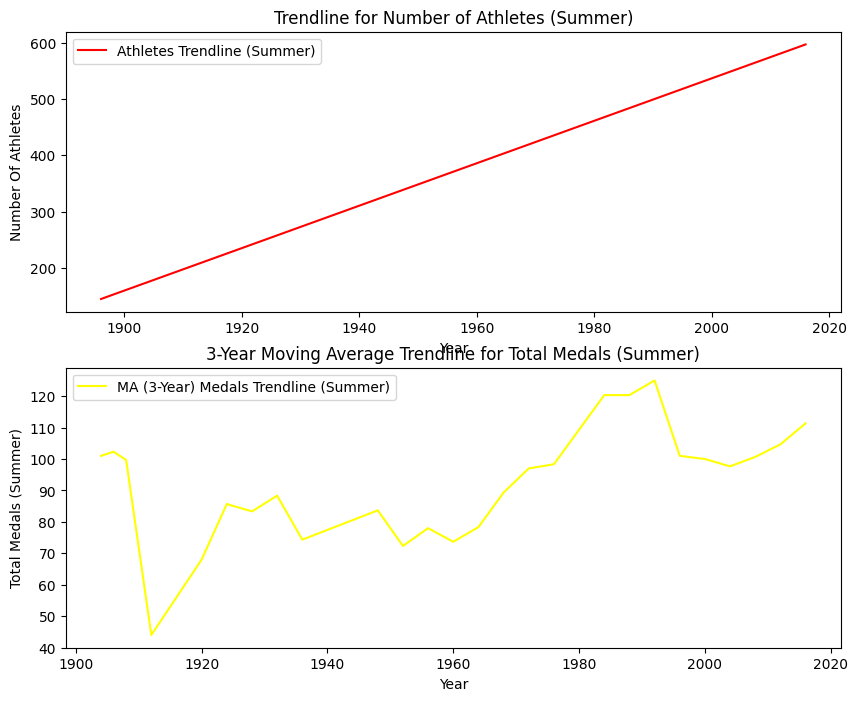

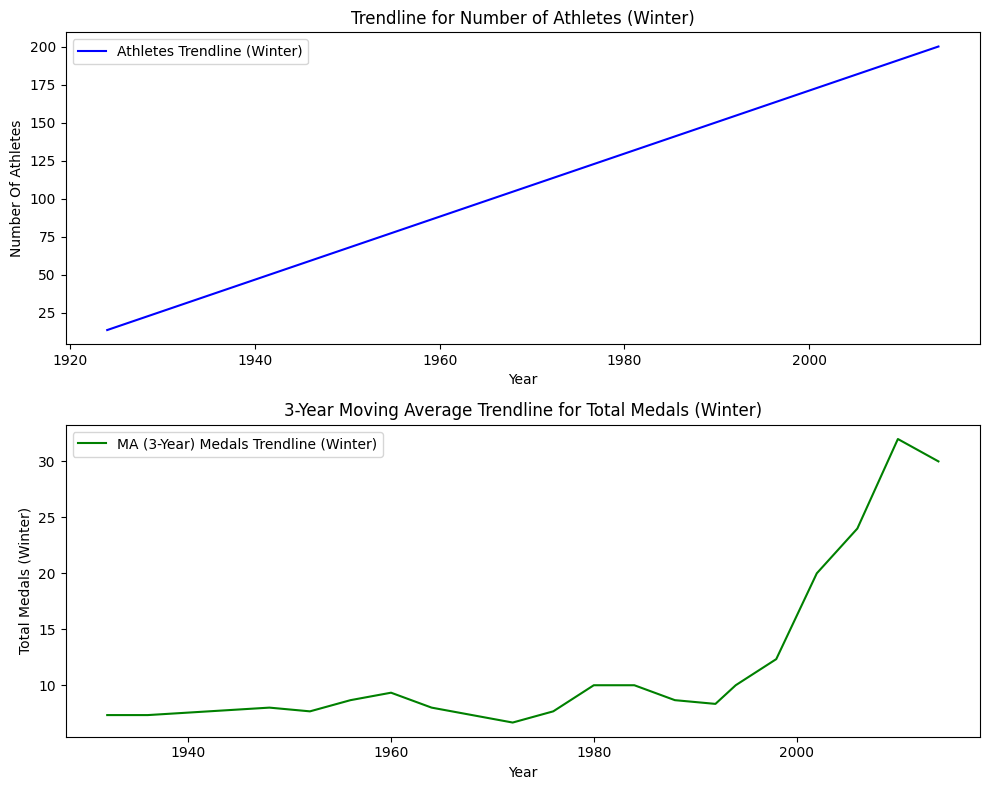

In [54]:
#Solve question here. Briefly justify your solution in the following markdown cell.
import numpy as np

# Calculate moving averages for Summer season
usa_summer_data = usa_data_summer
usa_summer_data_ma = usa_summer_data.copy()
window = 3
usa_summer_data_ma['Total Medals MA'] = usa_summer_data_ma['Total Number Of Medals'].rolling(window=window).mean()

# Calculate moving averages for Winter season
usa_winter_data = usa_data_winter
usa_winter_data_ma = usa_winter_data.copy()
window = 3
usa_winter_data_ma['Total Medals MA'] = usa_winter_data_ma['Total Number Of Medals'].rolling(window=window).mean()

# Create a figure with subplots for Summer season
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the trendline for the number of athletes for Summer
coefficients_athletes_summer = np.polyfit(usa_summer_data['Year'], usa_summer_data['Number Of Athletes'], 1)
trendline_athletes_summer = np.poly1d(coefficients_athletes_summer)
ax1.plot(usa_summer_data['Year'], trendline_athletes_summer(usa_summer_data['Year']), color='red', label='Athletes Trendline (Summer)')

# Plot the moving average trendline for the total number of medals for Summer
ax2.plot(usa_summer_data_ma['Year'], usa_summer_data_ma['Total Medals MA'], color='yellow', label=f'MA ({window}-Year) Medals Trendline (Summer)')

# Set titles and labels for Summer season
ax1.set_title('Trendline for Number of Athletes (Summer)')
ax2.set_title(f'{window}-Year Moving Average Trendline for Total Medals (Summer)')
ax1.set_xlabel('Year')
ax2.set_xlabel('Year')
ax1.set_ylabel('Number Of Athletes')
ax2.set_ylabel('Total Medals (Summer)')

# Add legends for Summer season
ax1.legend()
ax2.legend()

# Create a figure with subplots for Winter season
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the trendline for the number of athletes for Winter
coefficients_athletes_winter = np.polyfit(usa_winter_data['Year'], usa_winter_data['Number Of Athletes'], 1)
trendline_athletes_winter = np.poly1d(coefficients_athletes_winter)
ax3.plot(usa_winter_data['Year'], trendline_athletes_winter(usa_winter_data['Year']), color='blue', label='Athletes Trendline (Winter)')

# Plot the moving average trendline for the total number of medals for Winter
ax4.plot(usa_winter_data_ma['Year'], usa_winter_data_ma['Total Medals MA'], color='green', label=f'MA ({window}-Year) Medals Trendline (Winter)')

# Set titles and labels for Winter season
ax3.set_title('Trendline for Number of Athletes (Winter)')
ax4.set_title(f'{window}-Year Moving Average Trendline for Total Medals (Winter)')
ax3.set_xlabel('Year')
ax4.set_xlabel('Year')
ax3.set_ylabel('Number Of Athletes')
ax4.set_ylabel('Total Medals (Winter)')

# Add legends for Winter season
ax3.legend()
ax4.legend()

# Show the plots
plt.tight_layout()
plt.show()

**Rationale:** A trendline is a graphical representation used in advanced data analysis to identify and illustrate trends or patterns in datasets. I chose United States again and so I decided to do a simple polynomial trendline for the number of athletes for summer and winter (color red and blue in the plot) and a medals trendline with a moving average measured to 3 years for summer and winter (color yellow and green in the plot). The specific time period can be changed in the window variable and the value chosen depends on the data frequency, noise reduction, trend identification and visual clarity. Moving Average is useful for reducing noise in time series data and highlight long-term trends which is this case.

## Question 4 (5 points)

This third question focus on understanding the relations between elements.


### 4.a) Is there any relation between the medals won by different countries?

Study the relation in the evolution of medals won by different countries over the years.

Select four countries with a significative number of medals.

Note: Some useful
* Drop columns - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
* Rename columns - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)


In [55]:
#Solve question here. Briefly justify your solution in the following markdown cell.

# Drop rows with missing values in the 'Medal' column
medal_data = dataDF.dropna(subset=['Medal'])

# Define a list of possible medal types
possible_medals = ['Gold', 'Silver', 'Bronze']

# Filter rows where the 'Medal' column contains one of the possible medal types
medals = medal_data[medal_data['Medal'].isin(possible_medals)]

# Group the data by 'ID', 'Name', 'NOC', 'Year', 'Season', and 'Medal', and calculate the count of medals for each combination
medal_counts = medals.groupby(['ID', 'Name', 'NOC', 'Year', 'Season', 'Medal']).size().unstack(fill_value=0).reset_index()

# Rename the columns for clarity
medal_counts.columns = ['ID', 'Name', 'NOC', 'Year', 'Season', 'Bronze', 'Gold', 'Silver']

# Group the medal counts by 'NOC', 'Year', and 'Season' to calculate the number of unique athletes per country, year, and season
athletes_per_country_year = medal_counts.groupby(['NOC', 'Year', 'Season'])['ID'].nunique().reset_index()

# Group the medal counts by 'NOC', 'Year', and 'Season' to calculate the total number of each type of medal per country, year, and season
medals_per_country_year = medal_counts.groupby(['NOC', 'Year', 'Season']).agg({'Bronze': 'sum', 'Gold': 'sum', 'Silver': 'sum'}).reset_index()

# Calculate the total number of medals per country, year, and season
medals_per_country_year['Total Number Of Medals'] = medals_per_country_year['Bronze'] + medals_per_country_year['Gold'] + medals_per_country_year['Silver']

# Rename the 'NOC' column to 'Country' for clarity
medals_per_country_year.rename(columns={'NOC': 'Country'}, inplace=True)

# Rename columns in the 'athletes_per_country_year' DataFrame
athletes_per_country_year.rename(columns={'NOC': 'Country', 'ID': 'Number Of Athletes'}, inplace=True)

# Select the top 10 countries with the highest total number of medals
significative_country = medals_per_country_year.sort_values(by='Total Number Of Medals', ascending=False).head(10)

# Merge the 'athletes_per_country_year' and 'medals_per_country_year' DataFrames on 'Country', 'Year', and 'Season'
plot_data = pd.merge(athletes_per_country_year, medals_per_country_year, on=['Country', 'Year', 'Season'])

# Create separate DataFrames for specific countries (USA, GBR, GDR, CAN)
usa_data = plot_data[plot_data['Country'] == 'USA'].copy()
gbr_data = plot_data[plot_data['Country'] == 'GBR'].copy()
gdr_data = plot_data[plot_data['Country'] == 'GDR'].copy()
can_data = plot_data[plot_data['Country'] == 'CAN'].copy()

# Concatenate the DataFrames for the selected countries into one DataFrame
merged_data = pd.concat([usa_data, gbr_data, gdr_data, can_data])

# Perform correlation analysis between the selected countries (USA, GBR, GDR, CAN) for each medal type (Bronze, Gold, Silver) over the years and seasons
# Print the correlation coefficients

print("Relationship between USA, GBR, GDR and EUN when it comes to number of bronze medals won")
print(usa_data[["Year","Bronze"]].set_index("Year").corrwith(gbr_data[["Year","Bronze"]].set_index("Year"),drop=True))
print(usa_data[["Year","Bronze"]].set_index("Year").corrwith(gdr_data[["Year","Bronze"]].set_index("Year"),drop=True))
print(usa_data[["Year","Bronze"]].set_index("Year").corrwith(can_data[["Year","Bronze"]].set_index("Year"),drop=True))

print("Relationship between USA, GBR, GDR and EUN when it comes to number of gold medals won")
print(usa_data[["Year","Gold"]].set_index("Year").corrwith(gbr_data[["Year","Gold"]].set_index("Year"),drop=True))
print(usa_data[["Year","Gold"]].set_index("Year").corrwith(gdr_data[["Year","Gold"]].set_index("Year"),drop=True))
print(usa_data[["Year","Gold"]].set_index("Year").corrwith(can_data[["Year","Gold"]].set_index("Year"),drop=True))

print("Relationship between USA, GBR, GDR and EUN when it comes to number of silver medals won")
print(usa_data[["Year","Silver"]].set_index("Year").corrwith(gbr_data[["Year","Silver"]].set_index("Year"),drop=True))
print(usa_data[["Year","Silver"]].set_index("Year").corrwith(gdr_data[["Year","Silver"]].set_index("Year"),drop=True))
print(usa_data[["Year","Silver"]].set_index("Year").corrwith(can_data[["Year","Silver"]].set_index("Year"),drop=True))

Relationship between USA, GBR, GDR and EUN when it comes to number of bronze medals won
Bronze    0.104355
dtype: float64
Bronze   -0.031091
dtype: float64
Bronze    0.222327
dtype: float64
Relationship between USA, GBR, GDR and EUN when it comes to number of gold medals won
Gold    0.160656
dtype: float64
Gold   -0.112795
dtype: float64
Gold   -0.075922
dtype: float64
Relationship between USA, GBR, GDR and EUN when it comes to number of silver medals won
Silver    0.008297
dtype: float64
Silver   -0.059389
dtype: float64
Silver    0.094161
dtype: float64


**Present an interpretation of the results here:** By the observation of the values, I couldn't find any relation between the medals won by the countries chosen because each country behaves differently between the gold, bronze and silver medals won.

### 4.b) Extended analysis

As medals are competitive, one could expect that the fact that some countries starts winning more medals leads other countries to win less medals. But this would only be true if the total number of medals would have remained constant.

Suggest an alternative analysis and implement it.



**Analysis proposed:**

The proposed alternative analysis aims to explore whether there is a relationship between the total number of medals won by all countries in a given year and the individual medal counts for each country in that same year.

**Rationale of implementation:**

I will use Correlation Analysis and Visualization Of The Scatter Plot. In the first one, I will verify the correlation between the total number of medals awarded in a year and each country's medal count in that year. This will help determine whether there is a positive or negative correlation between these variables. In the second one, we will visualize the relationship using scatterplots and correlation coefficients to provide a clear understanding of the data.

In [56]:
#Solve question here. Briefly justify your solution in the following markdown cell.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Printing the correlation matrix for bronze medals
usa = plot_data[plot_data['Country'] == 'USA'].copy()
gbr = plot_data[plot_data['Country'] == 'GBR'].copy()
gdr = plot_data[plot_data['Country'] == 'GDR'].copy()
can = plot_data[plot_data['Country'] == 'CAN'].copy()

merged = pd.concat([usa, gbr, gdr, can])

# Calculate the correlation between each country' bronze medal count and the total medals awarded in the same year
correlation_matrix_bronze = merged.groupby('Country')[['Bronze', 'Total Number Of Medals']].corr().iloc[0::2, -1].unstack().reset_index()
correlation_matrix_bronze.columns = ['Bronze', 'Correlation']

print("Correlation Matrix for Bronze Medals")
print(correlation_matrix_bronze)

# Calculate the correlation between each country' gold medal count and the total medals awarded in the same year
correlation_matrix_gold = merged.groupby('Country')[['Gold', 'Total Number Of Medals']].corr().iloc[0::2, -1].unstack().reset_index()
correlation_matrix_gold.columns = ['Gold', 'Correlation']

print("Correlation Matrix for Gold Medals")
print(correlation_matrix_gold)

# Calculate the correlation between each country' silver medal count and the total medals awarded in the same year
correlation_matrix_silver = merged.groupby('Country')[['Silver', 'Total Number Of Medals']].corr().iloc[0::2, -1].unstack().reset_index()
correlation_matrix_silver.columns = ['Silver', 'Correlation']

print("Correlation Matrix for Silver Medals")
print(correlation_matrix_silver)

Correlation Matrix for Bronze Medals
  Bronze  Correlation
0    CAN     0.595189
1    GBR     0.897764
2    GDR     0.949178
3    USA     0.927922
Correlation Matrix for Gold Medals
  Gold  Correlation
0  CAN     0.747482
1  GBR     0.960437
2  GDR     0.954462
3  USA     0.949253
Correlation Matrix for Silver Medals
  Silver  Correlation
0    CAN     0.657300
1    GBR     0.969470
2    GDR     0.972138
3    USA     0.912083


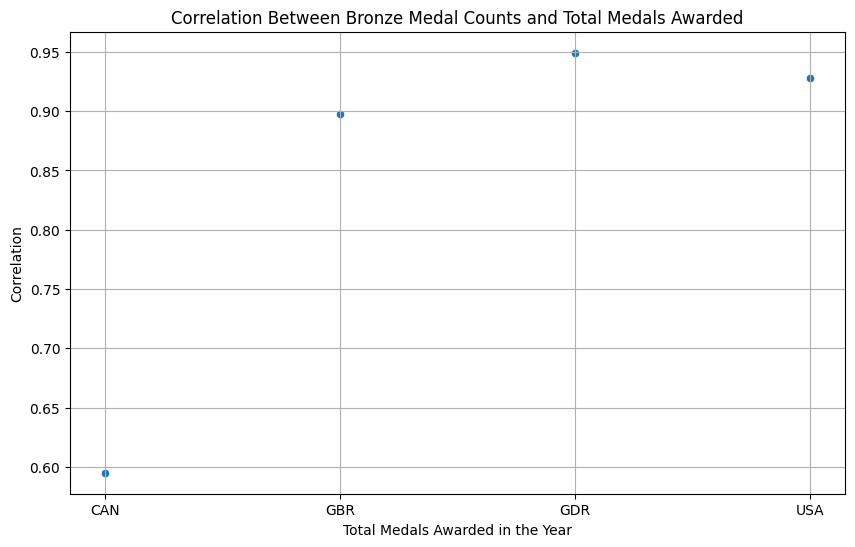

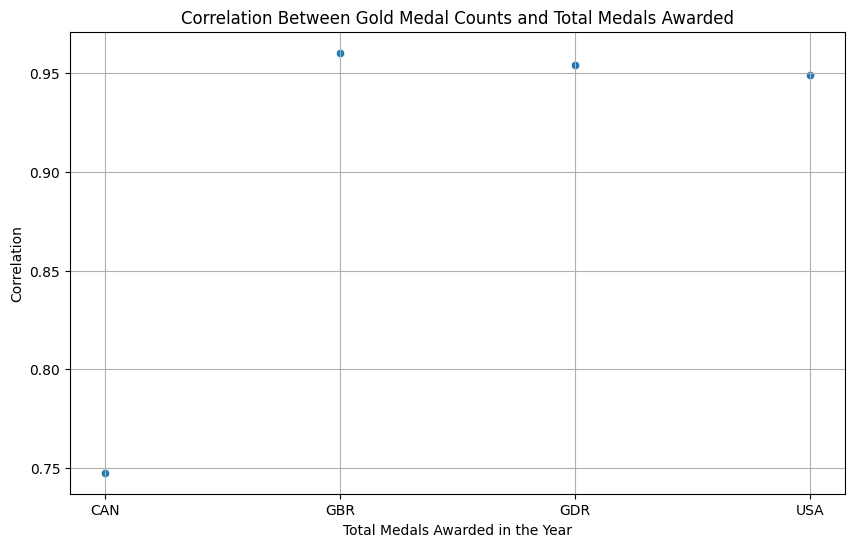

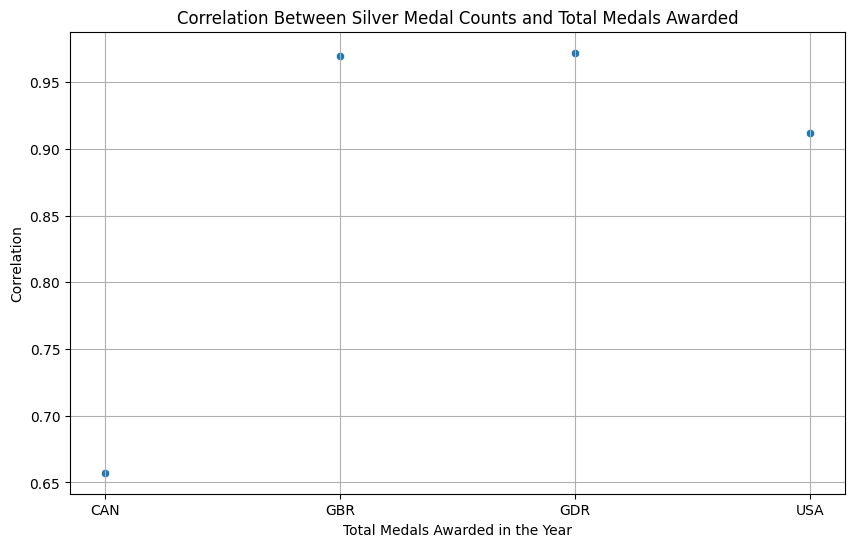

In [57]:
# Create scatterplots to visualize the relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_matrix_bronze, x='Bronze', y='Correlation')
plt.title('Correlation Between Bronze Medal Counts and Total Medals Awarded')
plt.xlabel('Total Medals Awarded in the Year')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_matrix_gold, x='Gold', y='Correlation')
plt.title('Correlation Between Gold Medal Counts and Total Medals Awarded')
plt.xlabel('Total Medals Awarded in the Year')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_matrix_silver, x='Silver', y='Correlation')
plt.title('Correlation Between Silver Medal Counts and Total Medals Awarded')
plt.xlabel('Total Medals Awarded in the Year')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


**Rationale and comments:** The alternative analysis allowed me to find that there is a relation between the type and number of medals won by different countries over time. I implemented the correlation matrix for the three types of medals and there is a strong positive correlation between winning silver, gold and bronze medals among these countries in some outputs. The most significative one is the one between the GDR and GBR in the Gold Medals. For example when GBR one wins a gold medal, increases the probabilities of GDR winning another one.

## Question 5 (2 points)

This group focus on implementation using Spark SQL.

### 5.a) Reimplement question 1.e in Spark SQL.


In [34]:
!apt-get install openjdk-11-jdk-headless
!pip install pyspark

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-11-jdk-headless is already the newest version (11.0.20.1+1-0ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=d9403add7e5637784ac4578d50f19b0e90ead506eee21495bf1a13a95817548f
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [58]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.appName("MedalCounts").getOrCreate()

# Assuming you have a Pandas DataFrame named dataDF
# Convert it to a Spark DataFrame
spark_df = spark.createDataFrame(dataDF)

# Register the Spark DataFrame as a temporary view
spark_df.createOrReplaceTempView("data_table")

# Filter out rows with non-null 'Medal' values
spark.sql("SELECT * FROM data_table WHERE Medal IS NOT NULL").createOrReplaceTempView("medal_data")

# Define the list of possible medals
possible_medals = ['Gold', 'Silver', 'Bronze']

# Filter rows with 'Medal' values in the list of possible medals
spark.sql(f"SELECT * FROM medal_data WHERE Medal IN {tuple(possible_medals)}").createOrReplaceTempView("medals_summer")

# Calculate medal counts by grouping
medal_counts = spark.sql("""
    SELECT
        ID,
        Name,
        SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze,
        SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold,
        SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver
    FROM
        medals_summer
    GROUP BY
        ID, Name
""")

# Show the resulting DataFrame
medal_counts.show()

# Stop the SparkSession when done
spark.stop()

## The name of the variable 'medals_summer' is not very explicit but the code is doing with two seasons

+-----+--------------------+------+----+------+
|   ID|                Name|Bronze|Gold|Silver|
+-----+--------------------+------+----+------+
| 1181|Meghan Christina ...|     0|   3|     0|
| 2434|  Cyril Albert Alden|     0|   0|     3|
| 3522|Edgar Montague Am...|     0|   0|     1|
| 4116|     Ioannis Andreou|     0|   0|     1|
| 4432|Harold Edward Ann...|     1|   0|     0|
| 5391|          Sedat Artu|     1|   0|     0|
| 5446|Yevhen Oleksandro...|     0|   0|     1|
| 6389|Mehdi Abdelhafid ...|     1|   0|     0|
| 6882|    Arthur B. Bailey|     0|   0|     1|
| 7400|    Ramona Balthasar|     0|   1|     0|
| 8043|        Andr Barrais|     0|   0|     1|
| 9013|    Gemma Beadsworth|     2|   0|     0|
| 9041|Colin Kenneth Bea...|     1|   0|     0|
| 9048|Jean-Guillaume Ba...|     1|   0|     0|
| 9154|Laura Bechtolshei...|     1|   1|     0|
| 9428| Kurt Edward Behrens|     1|   0|     1|
| 9561|Tanith Jessica Lo...|     0|   0|     1|
| 9638|Gregory Curtis "G...|     0|   1|

### 5.a) Reimplement question 1.d in Spark SQL.


In [59]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, rank, desc
from pyspark.sql.window import Window

# Create a SparkSession
spark = SparkSession.builder.appName("AthletesWithMostMedals").getOrCreate()

# Assuming you have a DataFrame named dataDF
# Convert it to a Spark DataFrame
spark_df = spark.createDataFrame(dataDF)

# Register the Spark DataFrame as a temporary view
spark_df.createOrReplaceTempView("data_table")

# Filter for participants in the Summer Olympics
summer = spark.sql("SELECT * FROM data_table WHERE Season = 'Summer'")

# Define the list of possible medals
possible_medals = ['Gold', 'Silver', 'Bronze']

# Filter rows with 'Medal' values in the list of possible medals
medals_summer = summer.filter(col('Medal').isin(possible_medals))

# Filter for participants in the Summer Olympics after 1950 with medals won
after_1950 = medals_summer.filter(col('Year') > 1950)

# Group by medals won per edition and count how many medals each participant won by the unique ID
medal_counts = after_1950.groupBy('Year', 'Name', 'ID').agg(count('Medal').alias('MedalCount'))

# Define a window specification for ranking athletes by MedalCount within each Year
window_spec = Window.partitionBy('Year').orderBy(col('MedalCount').desc())

# Calculate the rank of athletes by MedalCount within each Year
ranked_athletes = medal_counts.withColumn('Rank', rank().over(window_spec))

# Filter for athletes with the highest rank (i.e., rank 1) within each Year
athletes_with_most_medals = ranked_athletes.filter(col('Rank') == 1)

# Rename the columns
athletes_with_most_medals = athletes_with_most_medals.withColumnRenamed('MedalCount', 'Number of Medals')
athletes_with_most_medals = athletes_with_most_medals.withColumnRenamed('Name', 'Name of Athlete')

# Drop the 'ID' column
athletes_with_most_medals = athletes_with_most_medals.drop('ID')

# Drop the 'Rank' column
athletes_with_most_medals = athletes_with_most_medals.drop('Rank')

# Show the resulting DataFrame
athletes_with_most_medals.show()

# Stop the SparkSession when done
spark.stop()


+----+--------------------+----------------+
|Year|     Name of Athlete|Number of Medals|
+----+--------------------+----------------+
|1952|Mariya Kindrativn...|               7|
|1956|gnes Keleti-Srkny...|               6|
|1956|Larysa Semenivna ...|               6|
|1960|Borys Anfiyanovyc...|               7|
|1964|Larysa Semenivna ...|               6|
|1968|Mikhail Yakovlevi...|               7|
|1972|   Mark Andrew Spitz|               7|
|1976|Nikolay Yefimovic...|               7|
|1980|Aleksandr Nikolay...|               8|
|1984|             Li Ning|               6|
|1988|Matthew Nicholas ...|               7|
|1992|Vitaly Venediktov...|               6|
|1996|Aleksey Yuryevich...|               6|
|2000|Aleksey Yuryevich...|               6|
|2004|Michael Fred Phel...|               8|
|2008|Michael Fred Phel...|               8|
|2012|Michael Fred Phel...|               6|
|2016|Michael Fred Phel...|               6|
+----+--------------------+----------------+

